In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [86]:
big_data_path = "/home/rema/code/Alanoudis/food-delivery-rec/data/updated_data/orders_sg100k.txt"
big_data = pd.read_csv(big_data_path, sep=',', encoding='utf-8')
big_data.head()

,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days
3,3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days
4,4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days


# 1. *Data Cleaning*

In [87]:
big_data.drop(columns=['Unnamed: 0'], inplace=True)

### 1.1 Import products and vendors

In [88]:
file_path2 = "~/code/Alanoudis/food-delivery-rec/data/raw_data/products_sg.txt"
products = pd.read_csv(file_path2)
# Drop the unnecessary index column
products.drop(columns=['Unnamed: 0'], inplace=True)
# Multiply price by 1000 to make it more interpretable
unit_price = products['unit_price'] * 1000
products['unit_price'] = unit_price
products.head()

,vendor_id,product_id,name,unit_price
0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,3.6
1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,2.4
2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,2.4
3,7112a20b,d3e7708c2bc9,Maguro Sushi,1.2
4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,10.0


In [89]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+\.', '', text)         # Remove leading numbers like "204."
    text = re.sub(r'[^\w\s]', '', text)       # Remove punctuation
    text = re.sub(r'\d+', '', text)           # Remove remaining numbers
    text = text.strip()

In [90]:
# DROP PRODUCT NAME COLUMN
products.drop(columns=['name'], inplace=True)
products.head()

,vendor_id,product_id,unit_price
0,15bbf316,59099e089514,3.6
1,e7b24dc0,52e1017fdbd9,2.4
2,e7b24dc0,fcb7110cd932,2.4
3,7112a20b,d3e7708c2bc9,1.2
4,6137ef21,bf0d5ac0e03c,10.0


In [91]:
file_path3 = "~/code/Alanoudis/food-delivery-rec/data/raw_data/vendors_sg.txt"
vendors = pd.read_csv(file_path3)
# Drop the unnecessary index column
vendors.drop(columns=['Unnamed: 0'], inplace=True)
vendors.head()

,vendor_id,chain_id,geohash,primary_cuisine
0,b160c319,d2786168,w21z6,mexican
1,9c8f010e,d2786168,w21ze,mexican
2,03eb25e1,5055ab25,w21ze,bak kut teh
3,3613129a,8984acb6,w23b1,italian
4,0946c9e5,1e3a2913,w21z4,bak kut teh


### 1.2 Merge Into One Dataframe

In [92]:
# Step 1: Merge orders with products on vendor_id and product_id
orders_products = big_data.merge(products, on=['vendor_id', 'product_id'], how='left')

# Step 2: Merge the result with vendors on vendor_id
full_data = orders_products.merge(vendors, on='vendor_id', how='left')

# Preview the final merged dataset
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,unit_price,chain_id,geohash_y,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,6.0,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,6.8,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,6.8,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,6.8,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,8.0,66c9978d,w21z7,ramen


In [93]:
# Rename geohash_x to customer_geohash and geohash_y to vendor_geohash
full_data.rename(columns={'geohash_x': 'customer_geohash', 'geohash_y': 'vendor_geohash'}, inplace=True)
full_data.head()

,customer_id,customer_geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,unit_price,chain_id,vendor_geohash,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,6.0,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,6.8,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,6.8,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,6.8,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,8.0,66c9978d,w21z7,ramen


### 1.3 NaN values [will be revisited]

In [94]:
# For now, we will drop the null values
full_data.isnull().sum()

customer_id             0
customer_geohash        0
order_id                0
vendor_id               0
product_id              0
day_of_week             0
order_time              0
order_day               0
unit_price              1
chain_id            14827
vendor_geohash          0
primary_cuisine         0
dtype: int64

In [95]:
n_nan = full_data['chain_id'].isna().sum()
ratio_nan = n_nan / len(full_data)
print('NaN count:', n_nan, ' | ratio:', f'{ratio_nan:.2%}')

# عيّنة سريعة للمراجعة
display(full_data[full_data['chain_id'].isna()].head(10))


NaN count: 14827  | ratio: 14.83%


,customer_id,customer_geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,unit_price,chain_id,vendor_geohash,primary_cuisine
5,f374c8c54c,w21zt,1,21830106,f245bdf79350,4,19:03:03,61 days,2.0,NaN,w21zt,western
6,f374c8c54c,w21zt,1,21830106,146127be77d4,4,19:03:03,61 days,2.8,NaN,w21zt,western
7,f374c8c54c,w21zt,1,21830106,6c108c0fb2b9,4,19:03:03,61 days,1.6,NaN,w21zt,western
8,f374c8c54c,w21zt,1,21830106,da422c7836e1,4,19:03:03,61 days,2.4,NaN,w21zt,western
9,f374c8c54c,w21zt,1,21830106,01110c80a0fa,4,19:03:03,61 days,2.0,NaN,w21zt,western
10,f374c8c54c,w21zt,1,21830106,5289a6f50a7b,4,19:03:03,61 days,2.0,NaN,w21zt,western
11,f374c8c54c,w21zt,1,21830106,64a268be5f2e,4,19:03:03,61 days,3.6,NaN,w21zt,western
12,f374c8c54c,w21zt,1,21830106,adf53ab3befe,4,19:03:03,61 days,2.8,NaN,w21zt,western
13,2e7276ad3a,w21z6,2,ee4f2ee0,2c349859aa69,0,18:08:42,8 days,4.0,NaN,w21z7,vietnamese
14,2e7276ad3a,w21z6,2,ee4f2ee0,a3e4aac0520d,0,18:08:42,8 days,4.0,NaN,w21z7,vietnamese


In [96]:
# ننسخ البيانات عشان نشتغل عليها
df = full_data.copy()

# (أ) نبني mapping من vendor_id -> chain_id المعروف (نأخذ الـ mode في حال التكرار)
known = df.dropna(subset=['chain_id'])
vendor_to_chain = (
    known.groupby('vendor_id')['chain_id']
         .agg(lambda s: s.mode().iloc[0])  # الأكثر تكرارًا لضبط أي ضجيج
)

# (ب) نملأ القيم الناقصة من هذا الـ mapping
df['chain_id_filled'] = df['chain_id'].copy()
df['chain_id_filled'] = df['chain_id_filled'].fillna(df['vendor_id'].map(vendor_to_chain))

# (ج) ما بقي NaN بعد الخطوة السابقة نعتبره stand-alone -> chain_id = vendor_id
solo_mask = df['chain_id_filled'].isna()
df.loc[solo_mask, 'chain_id_filled'] = df.loc[solo_mask, 'vendor_id']
df['standalone_assumption'] = solo_mask  # عشان نعرف مين اتعبّى بهذه الفرضية


In [97]:
# يجب أن يكون لكل vendor_id قيمة chain_id واحدة بعد التعبئة
per_vendor_unique = df.groupby('vendor_id')['chain_id_filled'].nunique()
violations = per_vendor_unique[per_vendor_unique > 1]
print('Vendors with >1 chain_id after filling:', len(violations))

# إحصائية بسيطة: كم سلسلة لها أكثر من فرع، وكم stand-alone
branches_per_chain = df.groupby('chain_id_filled')['vendor_id'].nunique()
print('Chains with multiple branches:', (branches_per_chain > 1).sum())
print('Stand-alone vendors (filled as vendor_id):', df['standalone_assumption'].sum())


Vendors with >1 chain_id after filling: 0
Chains with multiple branches: 670
Stand-alone vendors (filled as vendor_id): 14827


In [98]:
full_data['chain_id'] = df['chain_id_filled']

In [99]:
full_data.isna().sum()

customer_id         0
customer_geohash    0
order_id            0
vendor_id           0
product_id          0
day_of_week         0
order_time          0
order_day           0
unit_price          1
chain_id            0
vendor_geohash      0
primary_cuisine     0
dtype: int64

In [100]:
print(full_data['unit_price'].isna().value_counts())

unit_price
False    100000
True          1
Name: count, dtype: int64


In [101]:
rows_with_na = full_data[full_data.isna().any(axis=1)]
print(rows_with_na)


      customer_id customer_geohash  order_id vendor_id    product_id  \
27540  f869fc7f2d            w21zt     13407  a06f1cbf  1cc4fc0888d2   

       day_of_week order_time order_day  unit_price  chain_id vendor_geohash  \
27540            1   11:56:42   44 days         NaN  f24465fd          w21zt   

      primary_cuisine  
27540         chinese  


In [102]:
# Since it's one row, I'll drop it
full_data = full_data.dropna()
full_data.isna().sum()


customer_id         0
customer_geohash    0
order_id            0
vendor_id           0
product_id          0
day_of_week         0
order_time          0
order_day           0
unit_price          0
chain_id            0
vendor_geohash      0
primary_cuisine     0
dtype: int64

# *2. Feature Engineering*

### 2.1 Categorize Cuisines

In [103]:
global_cuisine_category = {
    "japanese": "japanese",
    "ramen": "japanese",
    "sushi": "japanese",

    "chinese": "chinese",
    "dim sum": "chinese",
    "mala xiang guo": "chinese",
    "mala soups": "chinese",
    "hokkien mee": "chinese",
    "noodles": "chinese",
    "tea": "chinese",

    "indian": "indian",
    "curry": "indian",

    "thai": "thai",

    "vietnamese": "vietnamese",
    "pho": "vietnamese",

    "singaporean": "singaporean",
    "chicken rice": "singaporean",
    "ban mian": "singaporean",
    "yong tau foo": "singaporean",

    "indonesian": "indonesian",
    "ayam penyet": "indonesian",

    "malaysian": "malaysian",
    "nasi lemak": "malaysian",
    "roti prata": "malaysian",

    "american": "american",
    "burgers": "american",
    "sandwiches": "american",
    "grill": "american",
    "fries": "american",
    "fast food": "american",

    "italian": "italian",
    "pizza": "italian",
    "pasta": "italian",

    "french": "french",
    "german": "german",
    "spanish": "spanish",
    "mexican": "mexican",
    "turkish": "turkish",
    "lebanese": "lebanese",

    # Reassign rice-based dishes
    "rice dishes": "asian",
    "fried rice": "asian",
    "porridge": "asian",

    # Everything else defaults to snacks
}


In [104]:
full_data['cuisine_origin'] = full_data['primary_cuisine'].str.strip().map(global_cuisine_category)
full_data['cuisine_origin'].fillna('snacks', inplace=True)

/tmp/ipykernel_71484/605251586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['cuisine_origin'].fillna('snacks', inplace=True)


In [105]:
print(full_data[['primary_cuisine', 'cuisine_origin']].drop_duplicates().sort_values(by='primary_cuisine'))

     primary_cuisine cuisine_origin
3347       acai bowl         snacks
66          american       american
51             asian         snacks
170      ayam penyet     indonesian
2915     bak kut teh         snacks
...              ...            ...
92        vegetarian         snacks
13        vietnamese     vietnamese
5            western         snacks
5098           wraps         snacks
657     yong tau foo    singaporean

[77 rows x 2 columns]


In [106]:
# DROP PRIMARY CUISINE COLUMN
full_data.drop(columns=['primary_cuisine'], inplace=True)
full_data.head()

,customer_id,customer_geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,unit_price,chain_id,vendor_geohash,cuisine_origin
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,6.0,66c9978d,w21z7,japanese
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,8.0,66c9978d,w21z7,japanese


In [107]:
full_data.head(25)

,customer_id,customer_geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,unit_price,chain_id,vendor_geohash,cuisine_origin
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,6.0,66c9978d,w21z7,japanese
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,8.0,66c9978d,w21z7,japanese
5,f374c8c54c,w21zt,1,21830106,f245bdf79350,4,19:03:03,61 days,2.0,21830106,w21zt,snacks
6,f374c8c54c,w21zt,1,21830106,146127be77d4,4,19:03:03,61 days,2.8,21830106,w21zt,snacks
7,f374c8c54c,w21zt,1,21830106,6c108c0fb2b9,4,19:03:03,61 days,1.6,21830106,w21zt,snacks
8,f374c8c54c,w21zt,1,21830106,da422c7836e1,4,19:03:03,61 days,2.4,21830106,w21zt,snacks
9,f374c8c54c,w21zt,1,21830106,01110c80a0fa,4,19:03:03,61 days,2.0,21830106,w21zt,snacks


# *3. Generating Synthetic Data: Products Rating (Out of 5 stars)*

- add rate based on each dish (Product) 

- show order frequency in the app for each customer ,

- added 3 new columns (rating	,order_frequency)

In [108]:
# Set seed for reproducibility (optional)
np.random.seed(42)

# Total number of rows
n_rows =full_data.shape[0]
# Count UNIQUE orders per customer (not rows)
order_counts = full_data.groupby('customer_id')['order_id'].nunique()

# Map order counts back to original dataframe
full_data['order_frequency'] = full_data['customer_id'].map(order_counts)

# Define thresholds based on order frequency quartiles
high_freq_threshold = full_data['order_frequency'].quantile(0.75)
medium_freq_threshold = full_data['order_frequency'].quantile(0.50)


# Initialize rating column
ratings = np.zeros(n_rows)

# Assign ratings based on order frequency
for idx in range(n_rows):
    order_freq = full_data.iloc[idx, full_data.columns.get_loc('order_frequency')]

    if order_freq >= high_freq_threshold:
        # Most frequent orders: mostly 5 stars
        ratings[idx] = np.random.choice([5, 4, 3], p=[0.85, 0.10, 0.05])

    elif order_freq >= medium_freq_threshold:
        # Medium frequency: some lower ratings for 1, 2, 3 stars
        ratings[idx] = np.random.choice([5, 4, 3, 2, 1], p=[0.30, 0.25, 0.25, 0.15, 0.05])

    else:
        # Lower frequency: random distribution
        ratings[idx] = np.random.randint(1, 6)

# Add rating column to dataframe
full_data['product_rating'] = ratings.astype(int)

In [109]:
# Check how many orders each customer has made
order_counts = full_data.groupby('customer_id')['order_id'].nunique()
order_counts

customer_id
00119c8178     1
00198e01e4     1
001a5689fc    36
0021dbb4c6     4
002f7ec570     2
              ..
ffd9dd9790     3
ffe455a0e2     1
ffefdcea4e     3
fff7f1daa4     6
fffd947eb7     1
Name: order_id, Length: 11174, dtype: int64

In [111]:
full_data.head()

,customer_id,customer_geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,unit_price,chain_id,vendor_geohash,cuisine_origin,order_frequency,product_rating
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,6.0,66c9978d,w21z7,japanese,1,4
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese,1,5
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese,1,3
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese,1,5
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,8.0,66c9978d,w21z7,japanese,1,5


## geohash Categorize geohashes into regions (North of Singapore, South of Singapore)

In [123]:
 pip install geohash2


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 🟨 الخطوة 1: الاستيراد
from geohash2 import decode
import numpy as np
import pandas as pd

# 🟨 الخطوة 2: دالة فك geohash بشكل آمن
def safe_decode(gh, precision=7):
    """
    تفك geohash إلى (lat, lon)
    وتتعامل مع القيم المفقودة أو الغير صحيحة بدون أخطاء.
    """
    try:
        if pd.isna(gh) or not isinstance(gh, str) or len(gh) == 0:
            return pd.Series([np.nan, np.nan])
        gh_use = gh[:min(len(gh), precision)]
        lat, lon = decode(gh_use)
        return pd.Series([float(lat), float(lon)])
    except Exception:
        return pd.Series([np.nan, np.nan])

# 🟨 الخطوة 3: تطبيقها على الأعمدة الحقيقية
full_data[['customer_lat','customer_lon']] = full_data['customer_geohash'].apply(lambda x: safe_decode(x, precision=7))
full_data[['vendor_lat','vendor_lon']]     = full_data['vendor_geohash'].apply(lambda x: safe_decode(x, precision=7))


In [126]:
for col in ['customer_lat','customer_lon','vendor_lat','vendor_lon']:
    full_data[col] = pd.to_numeric(full_data[col], errors='coerce')

print(full_data[['customer_lat','customer_lon','vendor_lat','vendor_lon']].describe())


        customer_lat   customer_lon     vendor_lat     vendor_lon
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.342413     103.850316       1.340403     103.851272
std         0.051574       0.085868       0.050193       0.085871
min         1.300000     103.600000       1.300000     103.700000
25%         1.300000     103.800000       1.300000     103.800000
50%         1.300000     103.900000       1.300000     103.900000
75%         1.400000     103.900000       1.400000     103.900000
max         1.500000     104.000000       1.500000     104.000000


In [127]:
# حدود عملية مشتقة من describe() الذي أرسلته
CUST_LAT_SPLIT = 1.35
VEND_LAT_SPLIT = 1.35
CUST_LON_SPLIT = 103.85
VEND_LON_SPLIT = 103.85


In [128]:
def singapore_region(lat, lon):
    if pd.isna(lat) or pd.isna(lon):
        return np.nan
    if lat > 1.40:
        return 'North'
    elif lat < 1.32:
        return 'South'
    elif lon > 103.93:
        return 'East'
    elif lon < 103.75:
        return 'West'
    else:
        return 'Central'


In [129]:
full_data['customer_region'] = full_data.apply(lambda r: singapore_region(r['customer_lat'], r['customer_lon']), axis=1)
full_data['vendor_region']   = full_data.apply(lambda r: singapore_region(r['vendor_lat'], r['vendor_lon']), axis=1)


In [130]:
import numpy as np
import pandas as pd

# 1) دالة اتجاه واحد (N / S / E / W) بناءً على منتصف التوزيع
def one_direction(lat, lon, lat_mid, lon_mid):
    if pd.isna(lat) or pd.isna(lon):
        return np.nan
    d_lat = lat - lat_mid
    d_lon = lon - lon_mid
    if abs(d_lat) >= abs(d_lon):
        return 'North' if d_lat > 0 else 'South'
    else:
        return 'East' if d_lon > 0 else 'West'

# 2) نتأكد أن الأعمدة رقمية (في حال كانت سترنق)
for col in ['customer_lat','customer_lon','vendor_lat','vendor_lon']:
    full_data[col] = pd.to_numeric(full_data[col], errors='coerce')

# 3) نحسب نقطة المنتصف (median) لكل طرف
cust_lat_mid = full_data['customer_lat'].median()
cust_lon_mid = full_data['customer_lon'].median()
vend_lat_mid = full_data['vendor_lat'].median()
vend_lon_mid = full_data['vendor_lon'].median()

# 4) نولّد الأعمدة النهائية
full_data['customer_region'] = full_data.apply(
    lambda r: one_direction(r['customer_lat'], r['customer_lon'], cust_lat_mid, cust_lon_mid), axis=1
)
full_data['vendor_region'] = full_data.apply(
    lambda r: one_direction(r['vendor_lat'], r['vendor_lon'], vend_lat_mid, vend_lon_mid), axis=1
)

# (اختياري) فحص سريع
print(full_data['customer_region'].value_counts(dropna=False))
print(full_data['vendor_region'].value_counts(dropna=False))


customer_region
West     46387
South    24028
North    21484
East      8101
Name: count, dtype: int64
vendor_region
West     45588
South    26624
North    19436
East      8352
Name: count, dtype: int64


In [131]:
# 🟨 الخطوة 1: نحذف الأعمدة المشتقة الزايدة
cols_to_drop = [c for c in full_data.columns
                if c in ['customer_NS','customer_EW','customer_quad',
                         'vendor_NS','vendor_EW','vendor_quad']
                or c.endswith(('_lat','_lon'))]  # يحذف customer_lat/lon و vendor_lat/lon

full_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 🟨 الخطوة 2: نتأكد أن القيم صحيحة (من الاتجاهات الأربعة فقط)
valid = {'North','South','East','West'}
assert set(full_data['customer_region'].dropna().unique()).issubset(valid)
assert set(full_data['vendor_region'].dropna().unique()).issubset(valid)

# 🟨 الخطوة 3: نرتّب الأعمدة (خيار تنظيمي)
base_cols = [c for c in full_data.columns if c not in ['customer_region','vendor_region']]
full_data = full_data[base_cols + ['customer_region','vendor_region']]

# 🟨 الخطوة 4: عرض سريع للتأكد
full_data[['customer_region','vendor_region']].head()


,customer_region,vendor_region
0,South,South
1,South,South
2,South,South
3,South,South
4,South,South


In [132]:
full_data.head()

,customer_id,customer_geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,unit_price,chain_id,vendor_geohash,cuisine_origin,order_frequency,product_rating,customer_region,vendor_region
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,6.0,66c9978d,w21z7,japanese,1,4,South,South
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese,1,5,South,South
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese,1,3,South,South
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,6.8,66c9978d,w21z7,japanese,1,5,South,South
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,8.0,66c9978d,w21z7,japanese,1,5,South,South


In [133]:
# توزيع العملاء حسب الاتجاه
print(full_data['customer_region'].value_counts(normalize=True) * 100)

# توزيع المطاعم حسب الاتجاه
print(full_data['vendor_region'].value_counts(normalize=True) * 100)


customer_region
West     46.387
South    24.028
North    21.484
East      8.101
Name: proportion, dtype: float64
vendor_region
West     45.588
South    26.624
North    19.436
East      8.352
Name: proportion, dtype: float64


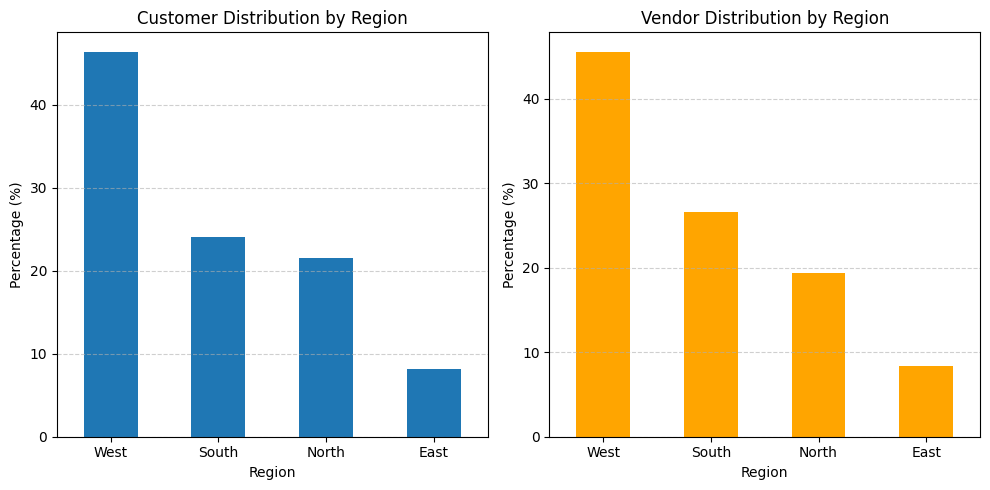

In [136]:
import matplotlib.pyplot as plt

# حساب التوزيع بالنسبة المئوية
customer_region_counts = full_data['customer_region'].value_counts(normalize=True) * 100
vendor_region_counts = full_data['vendor_region'].value_counts(normalize=True) * 100

# إعداد الشكل
plt.figure(figsize=(10,5))

# أول رسم: توزيع العملاء
plt.subplot(1, 2, 1)
customer_region_counts.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.ylabel('Percentage (%)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# ثاني رسم: توزيع المطاعم
plt.subplot(1, 2, 2)
vendor_region_counts.plot(kind='bar', color='orange')
plt.title('Vendor Distribution by Region')
plt.ylabel('Percentage (%)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [137]:
# هل العميل يطلب من نفس جهة المطعم؟
full_data['same_region'] = full_data['customer_region'] == full_data['vendor_region']

# النسبة المئوية
print(full_data['same_region'].value_counts(normalize=True) * 100)


same_region
True     85.03
False    14.97
Name: proportion, dtype: float64


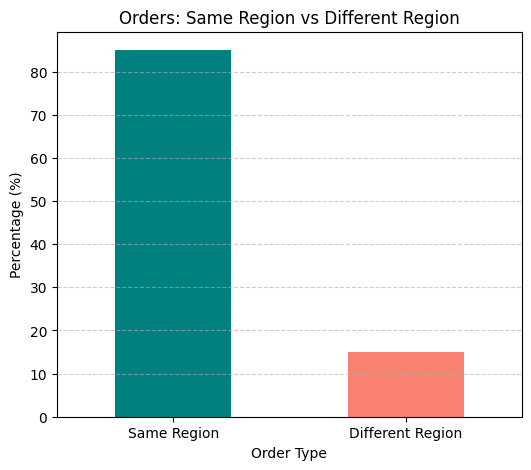

In [138]:
import matplotlib.pyplot as plt

# إنشاء العمود إذا ما كان موجود
full_data['same_region'] = full_data['customer_region'] == full_data['vendor_region']

# نحسب النسب
same_region_counts = full_data['same_region'].value_counts(normalize=True) * 100

# نرسم البار
plt.figure(figsize=(6,5))
same_region_counts.plot(kind='bar', color=['teal', 'salmon'])
plt.title('Orders: Same Region vs Different Region')
plt.ylabel('Percentage (%)')
plt.xlabel('Order Type')
plt.xticks(ticks=[0,1], labels=['Same Region', 'Different Region'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [139]:
region_cuisine = full_data.groupby(['customer_region', 'cuisine_origin']).size().reset_index(name='order_count')
top_cuisine_by_region = region_cuisine.sort_values(['customer_region', 'order_count'], ascending=[True, False])
print(top_cuisine_by_region.groupby('customer_region').head(3))


   customer_region cuisine_origin  order_count
10            East         snacks         2996
2             East        chinese         1648
3             East         indian          655
24           North         snacks         7879
16           North        chinese         5229
23           North    singaporean         1481
39           South         snacks         8821
29           South        chinese         4991
32           South         indian         1845
57            West         snacks        17096
46            West        chinese        10293
56            West    singaporean         3320


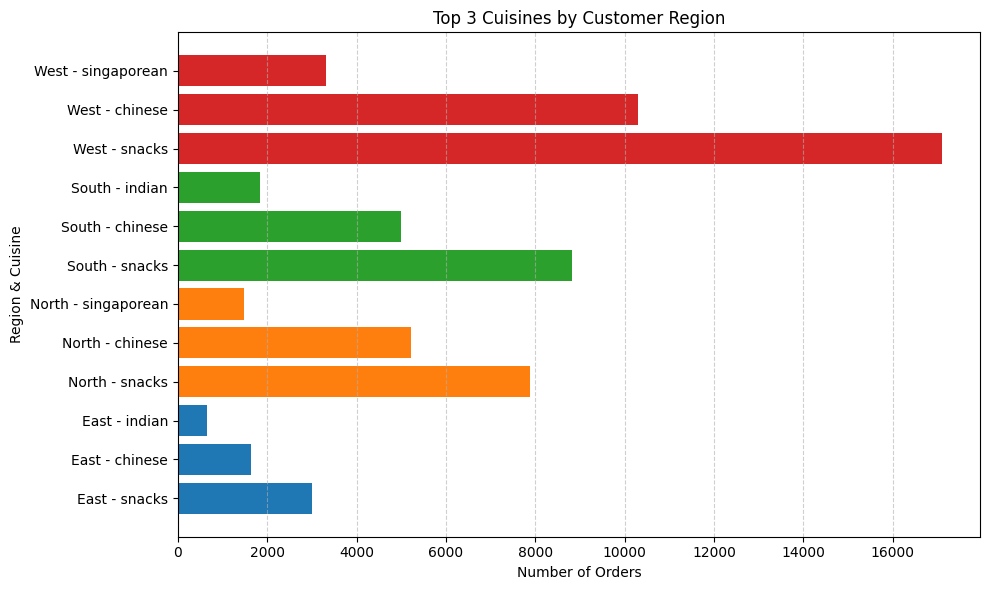

In [140]:
import matplotlib.pyplot as plt

# نرتب القيم
region_cuisine_sorted = region_cuisine.sort_values(['customer_region', 'order_count'], ascending=[True, False])

plt.figure(figsize=(10,6))
for region in region_cuisine_sorted['customer_region'].unique():
    subset = region_cuisine_sorted[region_cuisine_sorted['customer_region'] == region].head(3)
    plt.barh(subset['customer_region'] + " - " + subset['cuisine_origin'],
             subset['order_count'], label=region)

plt.title('Top 3 Cuisines by Customer Region')
plt.xlabel('Number of Orders')
plt.ylabel('Region & Cuisine')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [141]:
rating_by_region = full_data.groupby('customer_region')['product_rating'].mean().reset_index()
print(rating_by_region)


  customer_region  product_rating
0            East        3.619800
1           North        3.591557
2           South        3.676711
3            West        3.641387


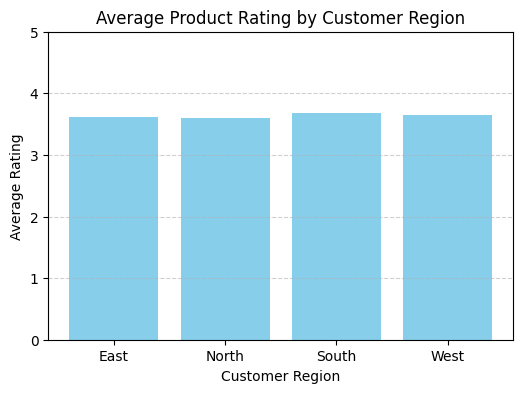

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(rating_by_region['customer_region'], rating_by_region['product_rating'], color='skyblue')
plt.title('Average Product Rating by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [144]:
orders_per_customer = full_data.groupby('customer_id')['order_id'].nunique().describe()
print(orders_per_customer)


count    11174.000000
mean         4.387775
std          6.903542
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        348.000000
Name: order_id, dtype: float64
